In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
g=GaussianNB()
b=BernoulliNB()
from xgboost import XGBClassifier
xgbc=XGBClassifier()

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df1=pd.read_csv("ttrain.csv")

In [5]:
df1.shape

(891, 12)

In [7]:
df2=pd.read_csv("ttest.csv")

In [8]:
df2.shape

(418, 11)

In [9]:
df=df1.append(df2) #iki dataframe birleşti

In [10]:
df.shape

(1309, 12)

In [11]:
df.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
619,620,0.0,2,"Gavey, Mr. Lawrence",male,26.00,0,0,31028,10.5000,NaN,S
158,1050,NaN,1,"Borebank, Mr. John James",male,42.00,0,0,110489,26.5500,D22,S
60,952,NaN,3,"Dika, Mr. Mirko",male,17.00,0,0,349232,7.8958,NaN,S
841,842,0.0,2,"Mudd, Mr. Thomas Charles",male,16.00,0,0,S.O./P.P. 3,10.5000,NaN,S
101,993,NaN,2,"Weisz, Mr. Leopold",male,27.00,1,0,228414,26.0000,NaN,S
250,1142,NaN,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
150,151,0.0,2,"Bateman, Rev. Robert James",male,51.00,0,0,S.O.P. 1166,12.5250,NaN,S
495,496,0.0,3,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C
252,253,0.0,1,"Stead, Mr. William Thomas",male,62.00,0,0,113514,26.5500,C87,S
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.00,0,0,PC 17754,34.6542,A5,C


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [13]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [15]:
df.Embarked.value_counts(normalize=True) #normalize=True bizde nereden binildiğini yüzde şeklinde verir.

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [18]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.',expand=False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Ms            2
Major         2
Sir           1
Jonkheer      1
Countess      1
Lady          1
Don           1
Mme           1
Dona          1
Capt          1
Name: Title, dtype: int64

In [19]:
df['Title'] = df['Title'].replace(['Ms', 'Mile'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Countess','Lady','Dona'], 'Mrs')
df['Title'] = df['Title'].replace(['Dr', 'Major','Col','Sir','Rev','Jonkheer','Capt','Don'], 'Mr')

In [20]:
df['Senior'] = df['Age'].map(lambda s:1 if s>70 else 0)

In [21]:
df.groupby('Sex')["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [23]:
df.isnull().sum() #Verileri eklediğimizi görüyoruz.

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

In [24]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].transform("median")

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Senior       1309 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [26]:
del df['Cabin']

In [27]:
df['Fare'].fillna(df["Fare"].mean(),inplace=True)

In [28]:
df["Family"] = df["SibSp"] + df["Parch"] + 1

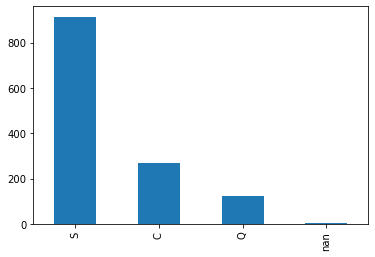

In [30]:
df.Embarked.value_counts(dropna=False).plot(kind='bar');

In [35]:
df['Embarked'] = df['Embarked'].fillna('S')

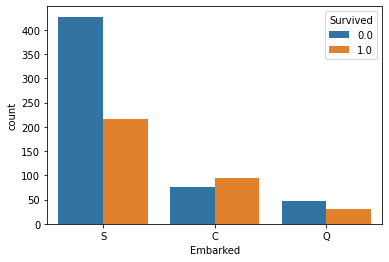

In [36]:
sns.countplot(x="Embarked", hue='Survived',data=df)

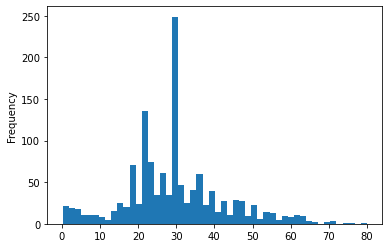

In [37]:
df.Age.plot(kind = 'hist', bins=50);

In [38]:
 df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

In [39]:
df['Single'] = df.Family<2
df['Small'] = (df.Family>1) & (df.Family<5)
df['Medium'] = (df.Family>4) & (df.Family<7)
df['Large'] = (df.Family>6)

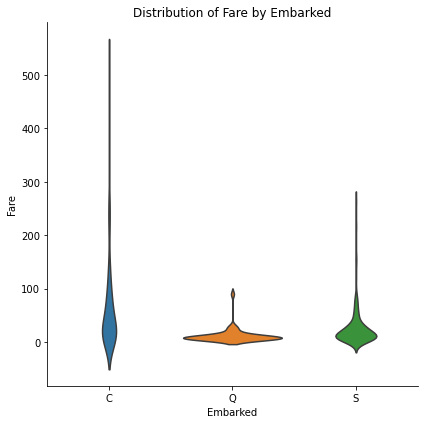

In [40]:
sns.catplot(x="Embarked", y="Fare", kind="violin", inner = None,
           data=df, height=6 , order = ['C','Q','S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

In [41]:
del df['Name']

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Embarked     1309 non-null   object 
 10  Title        1309 non-null   object 
 11  Senior       1309 non-null   int64  
 12  Family       1309 non-null   int64  
 13  Single       1309 non-null   bool   
 14  Small        1309 non-null   bool   
 15  Medium       1309 non-null   bool   
 16  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(4)
memory usage: 188.3+ KB


In [43]:
 df.drop(['PassengerId','Ticket'],axis=1,inplace=True)

In [45]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [46]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]

In [47]:
df_train.shape, df_test.shape

((891, 19), (418, 19))

In [48]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,0,2,False,True,False,False,1,0,1,0,0,1,0
1,1.0,1,38.0,1,0,71.2833,0,2,False,True,False,False,0,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,0,1,True,False,False,False,0,0,1,1,0,0,0
3,1.0,1,35.0,1,0,53.1000,0,2,False,True,False,False,0,0,1,0,0,0,1
4,0.0,3,35.0,0,0,8.0500,0,1,True,False,False,False,1,0,1,0,0,1,0


In [50]:
del df_train["Survived"]

In [51]:
y=df1["Survived"]

In [52]:
algorithms=[g,b,k,log,gbc,r,d,xgbc]
names = ['GaussianNB', 'BernoulliNB','K Nearest','Logistic','GradientBoosting','RandomForest','Decision Tree','XGBC']

In [53]:
def algo_test(X,y,algorithms = algorithms, names = names):
    for i in range(len(algorithms)):
        algorithms[i] = algorithms[i].fit(X,y)
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y,algorithms[i].predict(X)))
        precision.append(precision_score(y,algorithms[i].predict(X)))
        recall.append(recall_score(y,algorithms[i].predict(X)))
        f1.append(f1_score(y,algorithms[i].predict(X)))
    metrics = pd.DataFrame(columns=['Accuracy','Precision','Recall','F1'],index=names)
    metrics['Accuracy'] = accuracy
    metrics['Precision'] = precision
    metrics['Recall'] = recall
    metrics['F1'] = f1
    return metrics.sort_values('F1',ascending = False)

In [54]:
algo_test(df_train,y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:57:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Precision,Recall,F1
RandomForest,0.979798,0.987952,0.959064,0.973294
Decision Tree,0.979798,0.993902,0.953216,0.973134
XGBC,0.962963,0.972477,0.929825,0.950673
GradientBoosting,0.893378,0.902280,0.809942,0.853621
Logistic,0.829405,0.798742,0.742690,0.769697
K Nearest,0.818182,0.788462,0.719298,0.752294
BernoulliNB,0.810325,0.758209,0.742690,0.750369
GaussianNB,0.804714,0.781879,0.681287,0.728125


In [55]:
df_test.shape

(418, 19)

In [56]:
df_test.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Senior,Family,Single,Small,Medium,Large,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mlle,Title_Mr,Title_Mrs
0,NaN,3,34.5,0,0,7.8292,0,1,True,False,False,False,1,1,0,0,0,1,0
1,NaN,3,47.0,1,0,7.0000,0,2,False,True,False,False,0,0,1,0,0,0,1
2,NaN,2,62.0,0,0,9.6875,0,1,True,False,False,False,1,1,0,0,0,1,0
3,NaN,3,27.0,0,0,8.6625,0,1,True,False,False,False,1,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,0,3,False,True,False,False,0,0,1,0,0,0,1


In [57]:
del df_test["Survived"]

In [58]:
tahmin = d.predict(df_test)

In [59]:
tahmin

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [60]:
sonuc=df2[["PassengerId"]]

In [61]:
sonuc["Survived"]=tahmin

<ipython-input-61-1a650ac65ee0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc["Survived"]=tahmin


In [62]:
sonuc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,1
4,896,1


In [63]:
sonuc.to_csv("titanic_prediction",index=False)